In [ ]:
pip install yfinance

In [58]:
#@title Theoretical Options Pricing { run: "auto" }
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import sys
from scipy.stats import norm
from google.colab import data_table
data_table.enable_dataframe_formatter()

input_ticker = input("Input Ticker: ")

try:
  ticker = yf.Ticker(input_ticker)
except:
  raise Exception("Invalid Ticker")

date_list = ticker.options
print("Available Option Expiry Dates:")
for i in date_list:
  print(i)
print('\n')

input_type = "Calls" #@param ["Calls", "Puts"]

input_date = input("Date:")
if input_date not in date_list:
  raise  Exception("Sorry, please select another date")
options = ticker.option_chain(date = input_date).calls
pd.set_option("max_rows", None)
data = pd.DataFrame(options)


r = 0.26 #risk free interest rate (US Treasury One Year Rate as of 2021-12-13)
S = ticker.info['currentPrice'] #Spot price

end_date =  dt.datetime.strptime(input_date, '%Y-%m-%d')
start_date = dt.datetime.today() - dt.timedelta(hours = 5)

difference = end_date-start_date
difference_in_years = (difference.days + difference.seconds/86400)/365.2425
t = difference_in_years #time to maturity (time in years)
df = pd.DataFrame(columns = ['Theoretical Options Price', 'Strike', 'Implied Volatility'])

for i in options['strike'].values:
  K = i #Strike Price

  rslt_df = options.loc[options['strike'] == K]
  rslt_df = rslt_df.reset_index(drop=True)
  sigma = rslt_df['impliedVolatility'][0].astype(float)
  d1 = (np.log(S/K) + (r + (sigma*sigma)/2)*t)/(sigma * np.sqrt(t))
  d2 = d1-(sigma*np.sqrt(t))

  if input_type == "Calls":
    price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*t)*norm.cdf(d2, 0 ,1 )
  elif input_type == "Puts":
    price = K*np.exp(-r*t)*norm.cdf(-d2, 0 ,1 ) - S*norm.cdf(-d1, 0, 1)


  dict1 = {'Theoretical Options Price': price, 'Strike': K, 'Implied Volatility': sigma }
  df = df.append(dict1,ignore_index = True)

print("Theoretical Options Pricing for " + input_ticker + " " + input_type + ". Expiry Date: " + input_date )
df



Input Ticker: AAPL
Available Option Expiry Dates:
2021-12-23
2021-12-31
2022-01-07
2022-01-14
2022-01-21
2022-01-28
2022-02-18
2022-03-18
2022-04-14
2022-05-20
2022-06-17
2022-07-15
2022-09-16
2023-01-20
2023-03-17
2023-06-16
2023-09-15
2024-01-19


Date:2021-12-31
Theoretical Options Pricing for AAPL Calls. Expiry Date: 2021-12-31


,Theoretical Options Price,Strike,Implied Volatility
0,70.491907,100.0,1.203129
1,65.527556,105.0,1.101567
2,60.563081,110.0,1.003911
3,55.614889,115.0,0.957032
4,50.650495,120.0,0.863283
5,45.685477,125.0,0.771487
6,40.737107,130.0,0.710940
7,35.771885,135.0,0.622074
8,34.795346,136.0,0.625004
9,33.802504,137.0,0.607426


In [59]:
#@title Real Time Options Prices Based on Current Trades { run: "auto" }

import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from scipy.stats import norm
from google.colab import data_table
data_table.enable_dataframe_formatter()


strike_date= input_date
ticker = yf.Ticker(input_ticker)
Option_Type = "Calls" #@param ["Calls", "Puts"]

print("Current Price of " + input_ticker + " is: $" + str(ticker.info['currentPrice']))

if Option_Type == 'Calls':
  options = ticker.option_chain(date = strike_date).calls
else:
  options = ticker.option_chain(date = strike_date).puts
                                
pd.set_option("max_rows", None)
print('Options Pricing for Date: ' + strike_date)

options[['contractSymbol','lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask', 'volume', 'openInterest', 'impliedVolatility']]

Current Price of AAPL is: $169.75
Options Pricing for Date: 2021-12-31


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,volume,openInterest,impliedVolatility
0,AAPL211231C00100000,2021-12-20 14:30:03,100.0,68.51,68.85,70.75,25,606,1.203129
1,AAPL211231C00105000,2021-12-15 19:54:20,105.0,73.15,63.85,65.75,1,348,1.101567
2,AAPL211231C00110000,2021-12-08 19:24:09,110.0,65.00,58.80,60.80,8,207,1.003911
3,AAPL211231C00115000,2021-12-08 19:36:13,115.0,60.30,53.85,55.80,39,576,0.957032
4,AAPL211231C00120000,2021-12-20 14:57:33,120.0,49.75,48.85,50.80,11,293,0.863283
5,AAPL211231C00125000,2021-12-15 17:39:05,125.0,48.00,43.85,45.80,1,59,0.771487
6,AAPL211231C00130000,2021-12-16 20:58:49,130.0,42.33,38.90,40.80,31,344,0.710940
7,AAPL211231C00135000,2021-12-20 14:39:34,135.0,34.25,33.85,35.85,1,41,0.622074
8,AAPL211231C00136000,2021-12-20 20:53:02,136.0,33.89,32.90,34.85,40,93,0.625004
9,AAPL211231C00137000,2021-12-14 15:01:26,137.0,38.90,31.90,33.85,4,73,0.607426


Available Strike Prices for AAPL
100.0,  105.0,  110.0,  115.0,  120.0,  125.0,  130.0,  135.0,  136.0,  137.0,  138.0,  139.0,  140.0,  141.0,  142.0,  143.0,  144.0,  145.0,  146.0,  147.0,  148.0,  149.0,  150.0,  152.5,  155.0,  157.5,  160.0,  162.5,  165.0,  167.5,  170.0,  172.5,  175.0,  177.5,  180.0,  182.5,  185.0,  187.5,  190.0,  192.5,  195.0,  197.5,  200.0,  205.0,  210.0,  215.0,  220.0,  
Strike Price:170

Call option for AAPL. Strike Price: $170.0. Expiration Date: 2021-12-31
Max Loss (Premium for call): -4.35

Put option for AAPL. Strike Price: $170.0. Expiration Date: 2021-12-31
Max Loss (Premium for put): -4.65



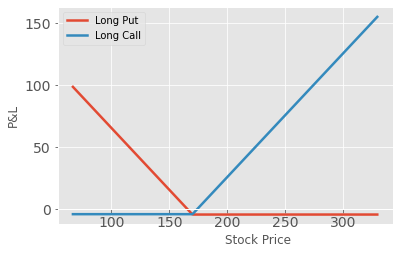

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def call_pl(stock_price, strike_price, premium): 
    return np.where(stock_price > strike_price, stock_price - strike_price, 0) - premium
def put_pl(stock_price, strike_price, premium):
  return np.where(stock_price < strike_price, strike_price - stock_price, 0) - premium

call_options = ticker.option_chain(date = strike_date).calls
put_options = ticker.option_chain(date = strike_date).puts
s = np.arange(options['strike'].min()/1.5,options['strike'].max()*1.5)
print("Available Strike Prices for " + input_ticker.upper() )
for i in options['strike']:
  print(str(i) +', ', end =" "),
print("")
strike= float(input("Strike Price:"))
call_rslt_df = call_options.loc[call_options['strike'] == strike]
call_rslt_df = call_rslt_df.reset_index(drop=True)

put_rslt_df = put_options.loc[put_options['strike'] == strike]
put_rslt_df = put_rslt_df.reset_index(drop=True)
try:
   call_premium =call_rslt_df['lastPrice'][0]
   put_premium = put_rslt_df['lastPrice'][0]
except:
  raise Exception("Strike price not applicable")

long_call = call_pl(s, strike, call_premium)
long_put = put_pl(s, strike, put_premium)

print("")
print("Call option for " + input_ticker + ". Strike Price: $" + str(strike)+ ". Expiration Date: " + strike_date)
print ("Max Loss (Premium for call):", min(long_call))
print("")
print("Put option for " + input_ticker + ". Strike Price: $" + str(strike) + ". Expiration Date: " + strike_date)
print ("Max Loss (Premium for put):", min(long_put))
print("")
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(s,long_put,label='Long Put')
ax.plot(s,long_call,label='Long Call')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('P&L')
plt.legend()
plt.show()